# Extract Population Characteristics from the RADx-rad Project

Population Characteristics

Author: Peter W Rose, UC San Diego (pwrose.ucsd@gmail.com)

Data last updated: 2025-06-09

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set pandas to display all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Ensure plots display inline
%matplotlib inline

In [3]:
# Results directory
result_dir = "../../results"

In [4]:
df = pd.read_csv(os.path.join(result_dir, "data_elements.csv"), dtype=str)
df = df[["Id", "subproject", "phs_id", "project_num", "radx_id", "tier", "filename"]].copy()
df = df[~df['subproject'].isin(['PreVAIL kIds', 'Wastewater'])]  # exclude non-diagnostic development project
df = df[df["tier"] == "tier1"]
df.head(100)

,Id,subproject,phs_id,project_num,radx_id,tier,filename
0,study_id,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,tier1,../../phs002522/rad_035_410-01_11845_Rapid1_DATA_origcopy.csv
11,study_id,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,tier1,../../phs002522/rad_035_410-01_26243_Rapid2_DATA_origcopy.csv
22,study_id,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,tier1,../../phs002522/rad_035_410-01_31686_Rapid1_DATA_origcopy.csv
33,study_id,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,tier1,../../phs002522/rad_035_410-01_11845_Tidal1_DATA_origcopy.csv
44,study_id,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,tier1,../../phs002522/rad_035_410-01_11845_Tidal2_DATA_origcopy.csv
55,study_id,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,tier1,../../phs002522/rad_035_410-01_34343_Rapid1_DATA_origcopy.csv
66,study_id,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,tier1,../../phs002522/rad_035_410-01_34343_Tidal1_DATA_origcopy.csv
77,study_id,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,tier1,../../phs002522/rad_035_410-01_34343_Rapid2_DATA_origcopy.csv
88,study_id,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,tier1,../../phs002522/rad_035_410-01_25012_Rapid1_DATA_origcopy.csv
99,study_id,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,rad_035_410-01,tier1,../../phs002522/rad_035_410-01_26243_Tidal1_DATA_origcopy.csv


In [5]:
# https://github.com/radxrad/common-data-elements/blob/main/cdes/RADx-rad_tier1_dict_2025-03-19.csv
# Map section to data elements 
min_cdes = pd.read_csv("https://raw.githubusercontent.com/radxrad/common-data-elements/refs/heads/main/cdes/RADx-rad_tier1_dict_2025-03-19.csv")
min_cdes.head()

,Id,Label,Examples,Section,Cardinality,Terms,Datatype,Unit,Enumeration,Notes,MissingValueCodes,Provenance,SeeAlso
0,study_id,RADx-rad Study ID; Subject ID; Datavent ID,NaN,Identity,single,NCIT:C164337,string,NaN,NaN,NaN,"""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,NaN
1,race,What is your race? Mark one or more boxes.,NaN,Race,single,GSSO:002199,integer,NaN,"""1""=[American Indian or Alaska Native] | ""2""=[Asian] | ""3""=[Black or African American] | ""4""=[Native Hawaiian or Other Pacific Islander] | ""5""=[White] | ""6""=[Some other race]",NaN,"""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,NaN
2,ethnicity,Are you of Hispanic or Latino origin?,NaN,Ethnicity,single,NCIT:C16564,integer,NaN,"""1""=[Yes, of Hispanic or Latino origin] | ""0""=[No, not of Hispanic or Latino origin]",NaN,"""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,NaN
3,age,What is your age?,NaN,Age,single,PATO:0000011,integer,NaN,NaN,"Age in years. For babies less than 1 year old, write 0 as the age","""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,NaN
4,sex,What is your biological sex assigned at birth?,NaN,Sex,single,PATO:0000047,integer,NaN,"""1""=[Male] | ""2""=[Female] | ""3""=[Intersex] | ""4""=[None of these describe me]",NaN,"""-9960""=[Not Entered By Originator]",RADx-rad Minimum CDE,NaN


In [6]:
# Field names that contain metrics
columns = df["Id"].unique()
print(f"Number of tier 1 data element: {len(columns)}")

Number of tier 1 data element: 46


In [7]:
df = df[["subproject", "phs_id", "project_num", "filename"]].drop_duplicates()
print(f"Number of data files with sample data: {df.shape[0]}")
df.head()

Number of data files with sample data: 107


,subproject,phs_id,project_num,filename
0,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,../../phs002522/rad_035_410-01_11845_Rapid1_DATA_origcopy.csv
11,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,../../phs002522/rad_035_410-01_26243_Rapid2_DATA_origcopy.csv
22,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,../../phs002522/rad_035_410-01_31686_Rapid1_DATA_origcopy.csv
33,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,../../phs002522/rad_035_410-01_11845_Tidal1_DATA_origcopy.csv
44,Novel Biosensing and VOC,phs002522.v1.p1,1U01HL152410-01,../../phs002522/rad_035_410-01_11845_Tidal2_DATA_origcopy.csv


In [8]:
def extract_data_element(df, data_elements):
    extract_list = []

    for _, row in df.iterrows():
        phs_id = row["phs_id"]
        sub_project = row["subproject"]
        data_file = row["filename"]

        data = pd.read_csv(data_file, dtype=str)

        # Use only data files with study or sample data
        if not (data.columns[0] == "study_id"):
            continue
        data = data.reindex(columns=data_elements)
        data = data.replace("nan", pd.NA)

        data["phs_id"] = phs_id

        extract_list.append(data)

    extracted_data = pd.concat(extract_list, ignore_index=True)
    extracted_data.drop_duplicates(inplace=True)

    return extracted_data

In [9]:
characteristics = extract_data_element(df, columns)
characteristics.head(100)

,study_id,race,ethnicity,age,sex,cardiovascular_disease,chronic_lung_disease,diabetes,serious_mental_illness,height_feet,height_inches,weight_lbs,asthma,cancer,chronic_kidney_disease,hypertension,immunosuppressive_conditio,cough,fever,shortness_of_breath_or_dif,headache,muscle_ache,new_loss_of_taste_or_smell,chills,excessive_fatigue,nausea_vomiting,diarrhea,abdominal_pain,skin_rash,nicotine,alcohol_use,zip,employment,insurance,deaf,blind,memory_dis,walking_climbing_dis,dress_bathe_dis,errand_dis,vaping,sickle_cell_disease,conjunctivitis,health_status,education,pregnancy_status,phs_id
0,11845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
10000,26243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
20000,31686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
50000,34343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
80000,25012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
190000,35045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
230000,63992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
240000,57123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
250000,36280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1
300000,37014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,phs002522.v1.p1


In [10]:
summary = (
    characteristics
    .groupby("phs_id")
    .agg({col: "count" for col in columns})
    .rename(columns={col: f"{col}" for col in columns})
    .reset_index()
)

In [11]:
summary.head()

,phs_id,study_id,race,ethnicity,age,sex,cardiovascular_disease,chronic_lung_disease,diabetes,serious_mental_illness,height_feet,height_inches,weight_lbs,asthma,cancer,chronic_kidney_disease,hypertension,immunosuppressive_conditio,cough,fever,shortness_of_breath_or_dif,headache,muscle_ache,new_loss_of_taste_or_smell,chills,excessive_fatigue,nausea_vomiting,diarrhea,abdominal_pain,skin_rash,nicotine,alcohol_use,zip,employment,insurance,deaf,blind,memory_dis,walking_climbing_dis,dress_bathe_dis,errand_dis,vaping,sickle_cell_disease,conjunctivitis,health_status,education,pregnancy_status
0,phs002522.v1.p1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,phs002523.v1.p1,333,318,10,328,329,329,329,329,329,326,322,315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,phs002524.v1.p1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,phs002544.v1.p1,646,120,120,168,168,65,65,65,0,49,49,49,65,113,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,47,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,phs002551.v1.p1,578,276,267,280,0,283,282,284,284,284,282,281,284,284,282,283,282,283,283,283,282,284,283,284,283,281,283,284,284,283,282,282,283,156,284,284,284,284,284,284,283,281,281,284,0,0


In [12]:
# Create the summary
def count_non_blank(series):
    return (
        series.dropna()
              .astype(str)
              .str.strip()
              .replace("", pd.NA)
              .dropna()
              .count()
    )


non_blank_counts = {
    f"{col}": count_non_blank(characteristics[col])
    for col in columns
}

# Create DataFrame, transpose, sort
summary_df = pd.DataFrame([non_blank_counts]).T  # transpose
summary_df.columns = ["count"]  # rename column for clarity
summary_df = summary_df.sort_values(by="count", ascending=False)

In [13]:
summary_df.head(46)

,count
study_id,14107
sex,7121
serious_mental_illness,6857
height_feet,6833
height_inches,6826
immunosuppressive_conditio,6590
sickle_cell_disease,6524
employment,6510
diabetes,6485
chronic_lung_disease,6482


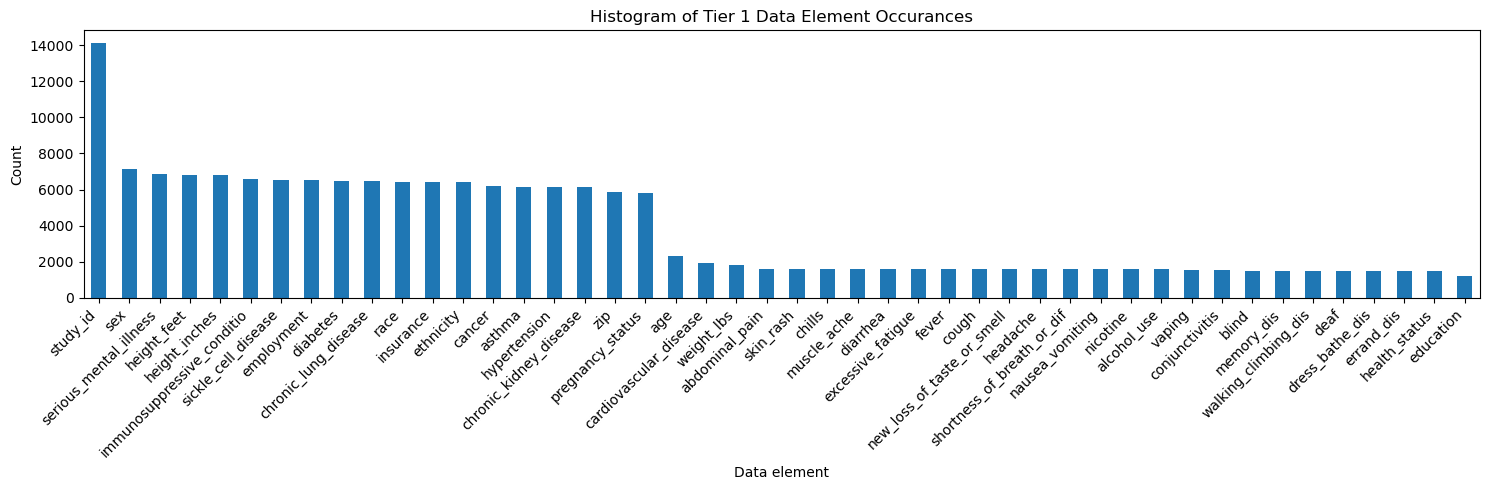

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
summary_df["count"].plot(kind="bar", ax=ax)

ax.set_xlabel("Data element")
ax.set_ylabel("Count")
ax.set_title("Histogram of Tier 1 Data Element Occurances")
ax.yaxis.get_major_locator().set_params(integer=True)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()